# Projet : Trajectoire d‚Äôun bras de robot aÃÄ 2 articulations.




## Objectifs du projet :
- Mettre en √©quation la trajectoire de l‚Äôoutil d‚Äôun bras articul√© √† 2 degr√©s de lib√©rt√©
- R√©soudre un probl√®me inverse
- Utiliser scipy.optimize pour r√©soudre un syst√®me d‚Äô√©quations non lin√©aires
- Programmer et comparer diff√©rentes m√©thodes pour r√©soudre le syst√®me d‚Äô√©quations non lin√©aires par minimisation du r√©sidu du syst√®me 


# I.<u> √âTUDE G√âN√âRALE:</u>

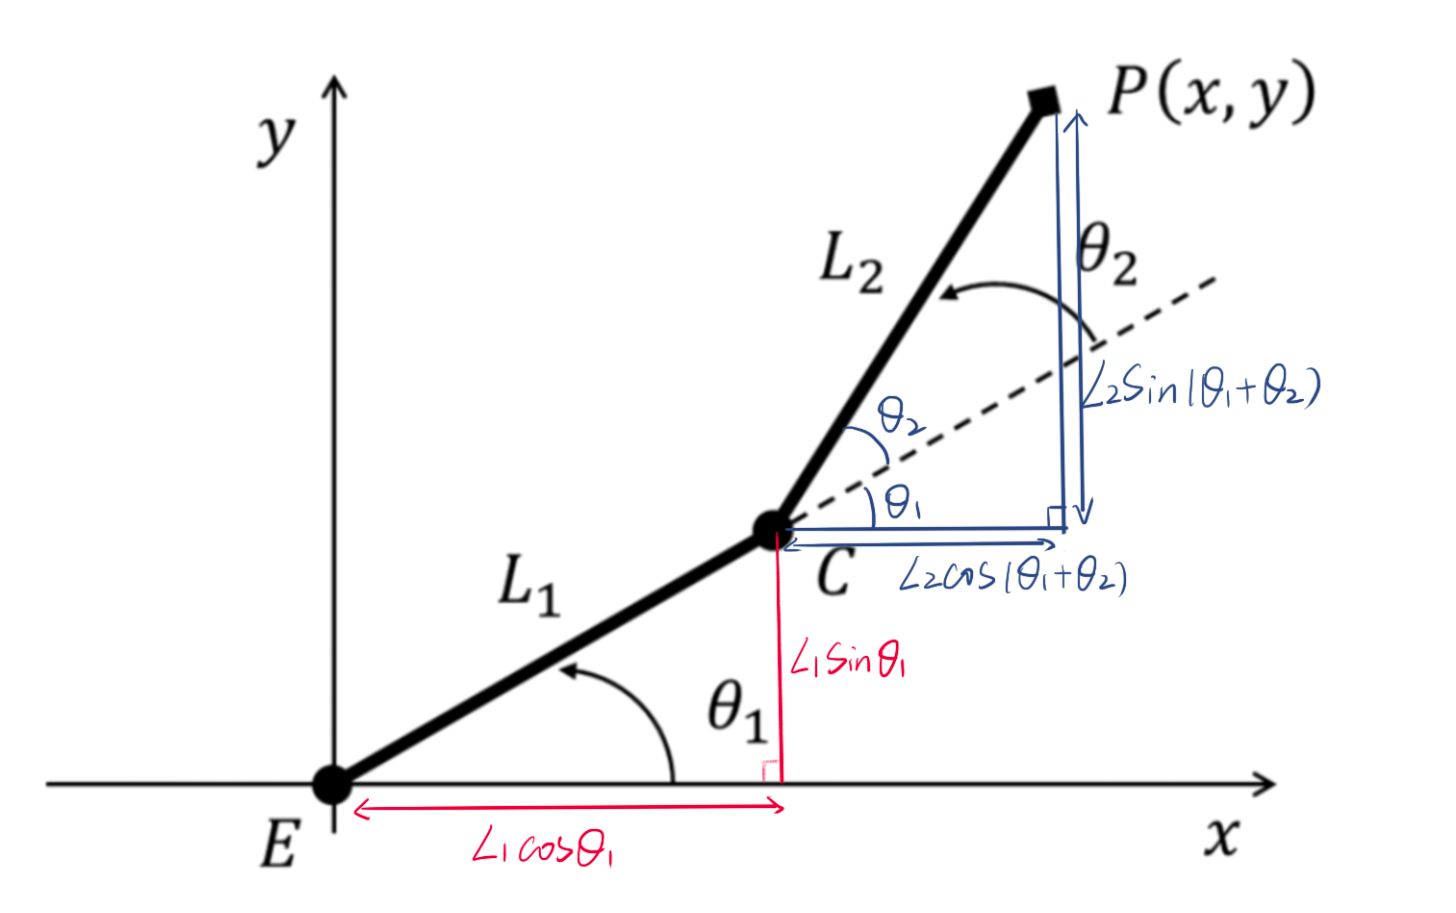




Les √©quations donn√© par les coordonn√©es $c$ :Ôºà$L_1cos(\theta_1)$ et $L_1sin(\theta_1)$)

Pour les coordonn√©es du point $P$, On a les 2 equations suivantes:  
$$ x = L_1cos(\theta_1)+L_2cos(\theta_1+\theta_2)\\ y = L_1sin(\theta_1)+L_2sin(\theta_1+\theta_2) $$ 

On defini: $$ X = \begin{pmatrix}x  \\ y  \end{pmatrix}$$

Avec:  $$\theta = \begin{pmatrix}\theta_1 \\ \theta_2  \end{pmatrix}$$


On aura un relation du type :  $R(\theta)=F(\theta)-X$

C'est-√†-dire :$$R(\theta)=\begin{pmatrix}L_1cos(\theta_1)+L_2cos(\theta_1+\theta_2)-x  \\ L_1sin(\theta_1)+L_2sin(\theta_1+\theta_2)-y  \end{pmatrix}$$

Les angles $\theta_1$ et $\theta_2$ doivent √™tre compris entre -180&deg; et 180&deg;, ce qui correspond √† -3,14 et 3.14 en radians. 

Parmi les zones qui peuvent √™tre atteintes par ce bras robotique (zones o√π des solutions existent) on a: 

- Premiers cas: L2 > L1  
Domaines possibles: Cercle de rayon L1+L2 avec l'origine comme centre  
Pour tous les points sauf sur le cercle de rayon L1+L2, il existe deux solutions.

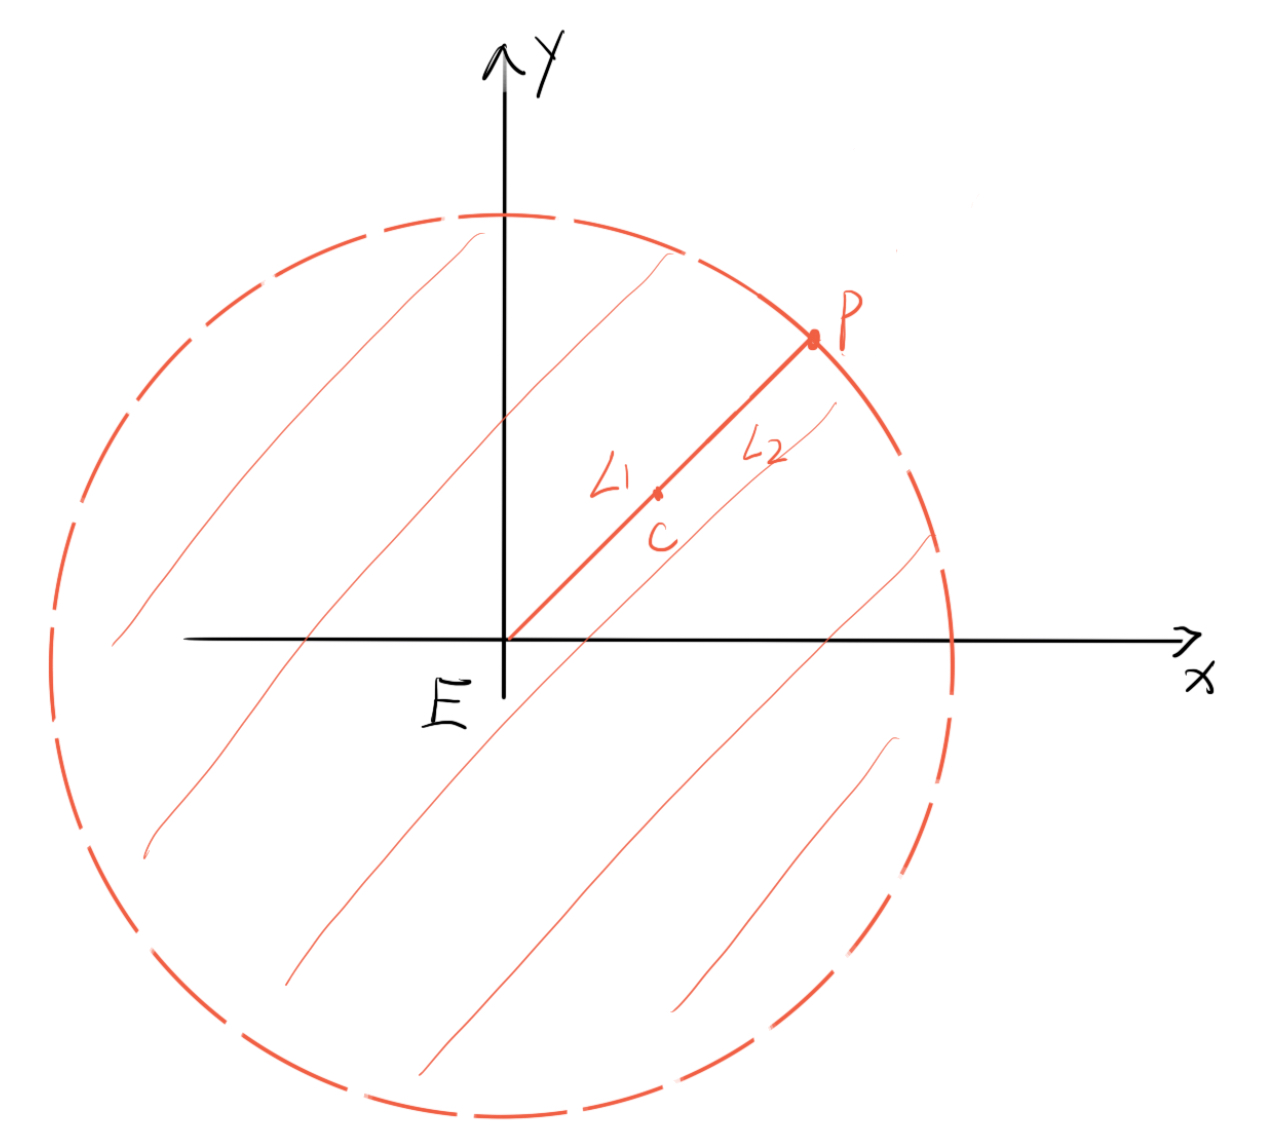

- Deuxi√®me cas: L2 < L1  
Domaines possiblesÔºöun cercle de rayon L1+L2 avec l'origine comme centre, le cercle central de rayon L1-L2 ne peut √™tre touch√©

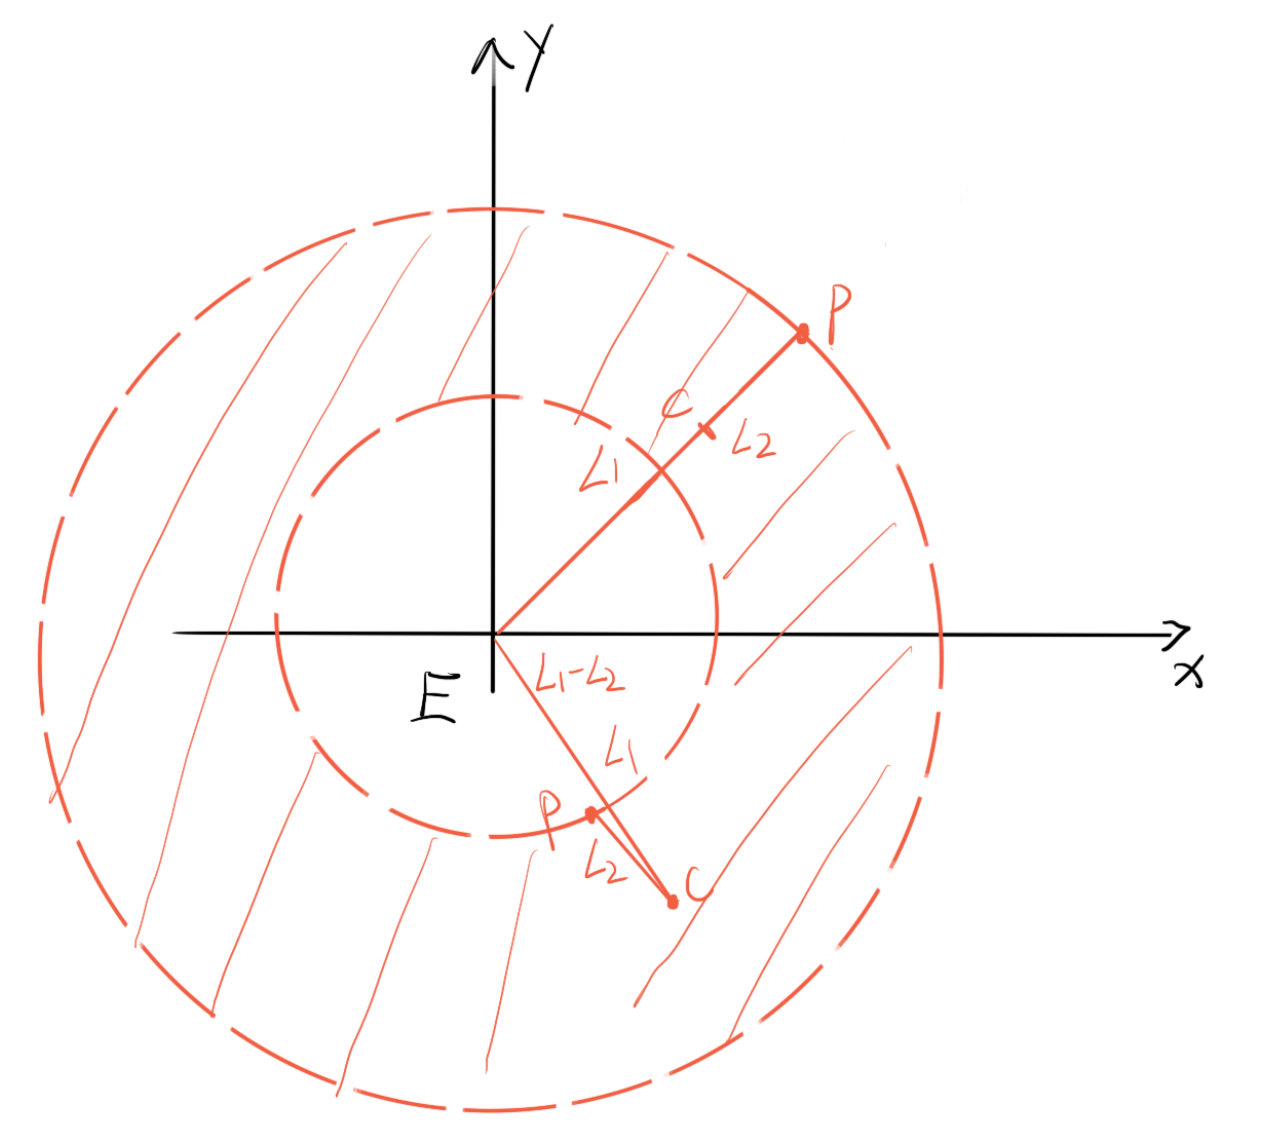

- Troisi√®me cas: L2 = L1  
Domaines possibles: Cercle de rayon L1+L2 avec l'origine E comme centre.

Pour l'origine E, le bras du robot peut √™tre atteint dans n'importe quelle attitude, il existe donc une infinit√© de solutions.
Pour toutes les autres r√©gions atteignables, sauf sur la circonf√©rence du cercle de rayon L1+L2, il existe deux solutions.  
Il existe deux solutions pour toutes les r√©gions, sauf l'origine et la fronti√®re.

# II.<u> EXISTENCE DE SOLUTION:</u>

L'image de surface 3D de la fonction est la suivante:

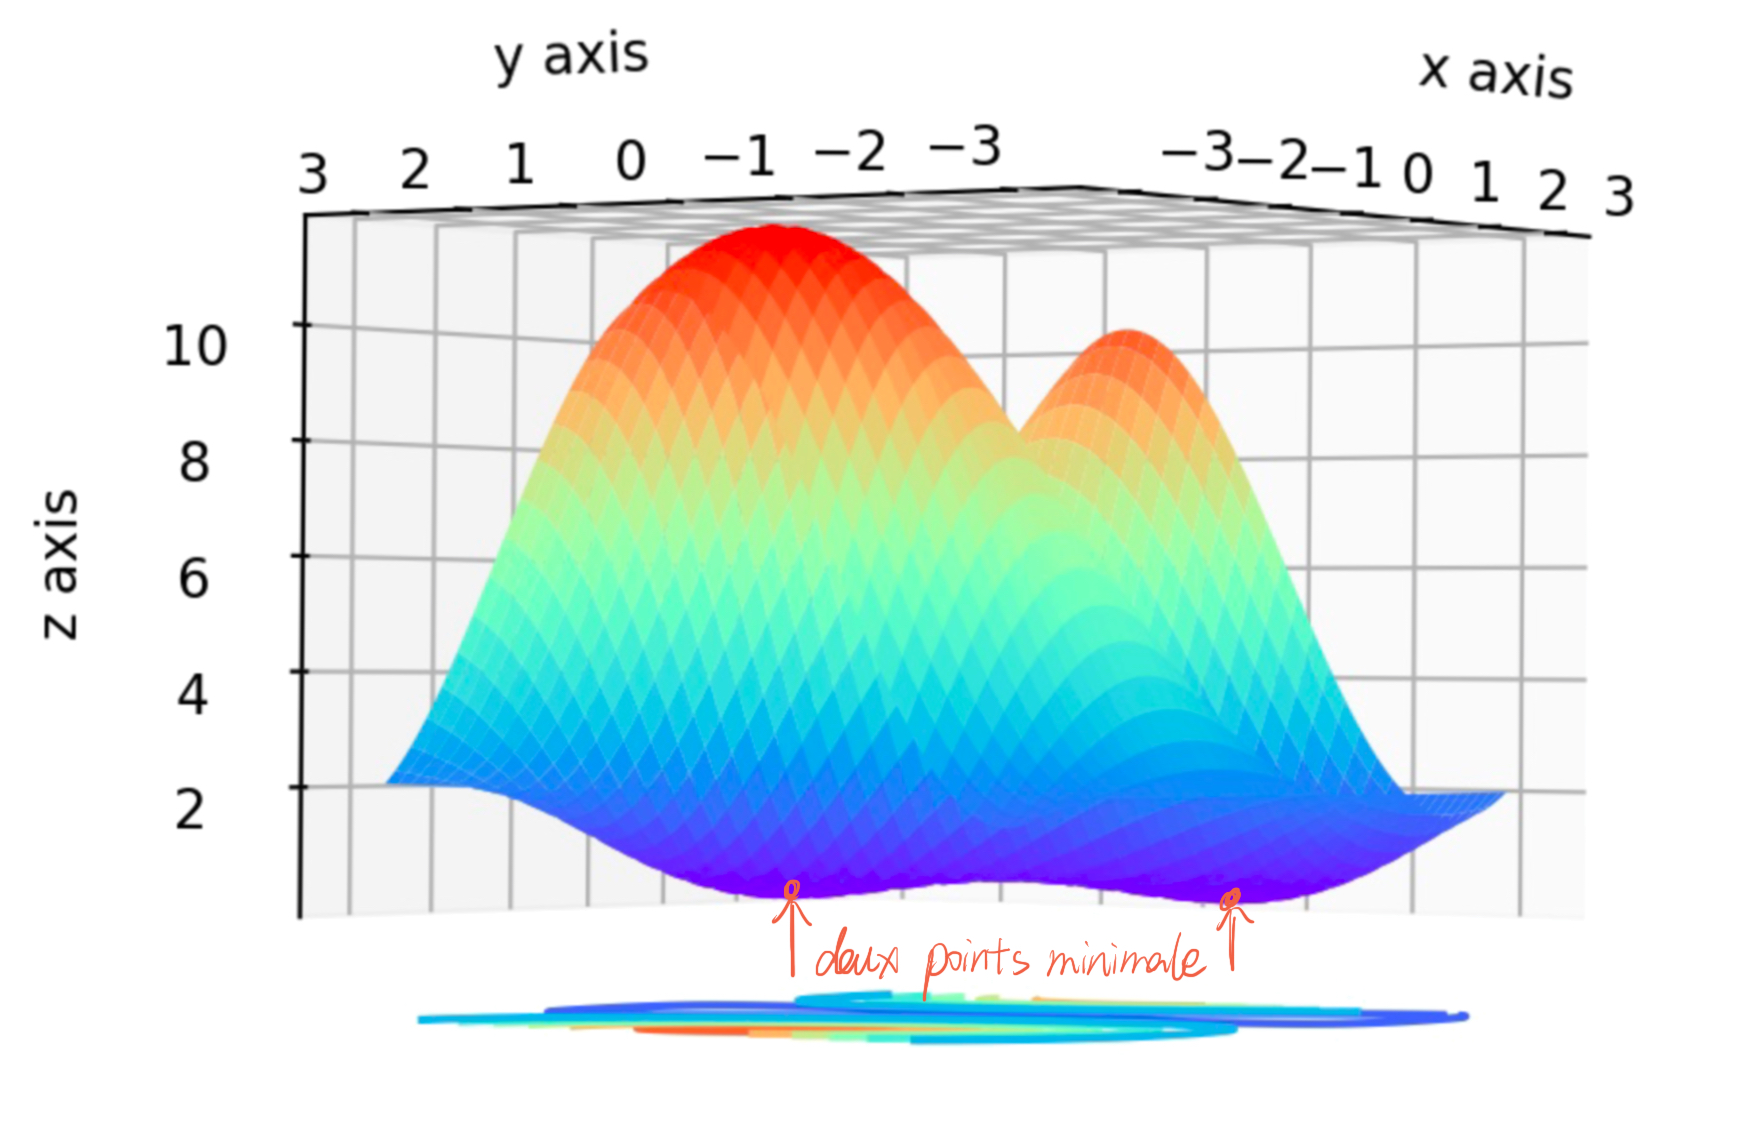

A partir de ce graphique, on peut voir que la fonction a 2 minimum ce qui veut dire que notre solution n'est pas unique et qu'il existe au moins deux solutions.

### Test des diff√©rents m√©thodes:

In [1]:
#Importation des biblioth√®que
import numpy as np                 #Importation de la biblioth√®que numpy 
import scipy.optimize              #Importation de la biblioth√®que scipy.optimize
import matplotlib.pyplot as plt    #Importation de la biblioth√®que matplotlib
from Fonctions import *            #Importation de mes fonction

Pour la partie suivante, nous utiliserons :  $x = 1{\,}  
 y = 1 {\,}
 L_1=1 {\,}
 L_2=1$ pour le test

In [2]:
#D√©claration des variables
L1 = 1
L2 = 1
x = 1
y = 1

# Param√®tres de la fonction √† annuler
param = [L1, L2, x, y]


### 1. Premi√®re m√©thode:

Premi√®re m√©thode : utiliser la fonction ¬´ root ¬ª de la biblioth√®que scypy.optimize appliqu√©es au r√©sidu.

$R(\theta)=0$

$L_1cos(\theta_1)+L_2cos(\theta_1+\theta_2)-x=0$ 

$L_1sin(\theta_1)+L_2sin(\theta_1+\theta_2)-y=0$

Resolution de la m√©thode de root avec plusieur valeur initial:

In [3]:
# R√©solution par la m√©thode root
sol_root1 = scipy.optimize.root(Residu,[0,0],param)
sol_root2 = scipy.optimize.root(Residu,[0,1.5],param)
sol_root3 = scipy.optimize.root(Residu,[2,2],param)
sol_root4 = scipy.optimize.root(Residu,[2.5,-2],param)

print(f"Points de pr√©diction = (0, 0)   {sol_root1.message} R√©sultats obtenusÔºö[{sol_root1.x[0]}, {sol_root1.x[1]}]")
print(f"Points de pr√©diction = (0, 1.5) {sol_root2.message} R√©sultats obtenusÔºö[{sol_root2.x[0]}, {sol_root2.x[1]}]")
print(f"Points de pr√©diction = (2, 2) {sol_root3.message} R√©sultats obtenusÔºö[{sol_root3.x[0]}, {sol_root3.x[1]}]")
print(f"Points de pr√©diction = (2.5, -2) {sol_root4.message} R√©sultats obtenusÔºö[{sol_root4.x[0]}, {sol_root4.x[1]}]")
# Print des solutions


Points de pr√©diction = (0, 0)   The solution converged. R√©sultats obtenusÔºö[1.5707963267933236, -1.5707963267934593]
Points de pr√©diction = (0, 1.5) The solution converged. R√©sultats obtenusÔºö[1.271541668074626e-10, 1.5707963266640046]
Points de pr√©diction = (2, 2) The solution converged. R√©sultats obtenusÔºö[-4.712388980293799, 4.712388980276411]
Points de pr√©diction = (2.5, -2) The solution converged. R√©sultats obtenusÔºö[1.570796326794926, -1.5707963267949623]


- Interpretation des r√©sultats:  
    - Cette fonction est une fonction p√©riodique car les fonctions trigonom√©triques sont p√©riodiques. Par cons√©quent, cette solution est √©galement l'une des valeurs minimales de la fonction 
    - Cette m√©thode permet de trouver les z√©ros d'une fonction, c-√†-d les points o√π la fonction prend la valeur z√©ro. Lorsque la fonction  a plusieurs minimums, cette fonction trouve uniquement les z√©ros les plus proches de la valeur initiale choisie. Dans ce cas, il est recommand√© de choisir une valeur initiale proche des z√©ros souhait√©s et d'ex√©cuter plusieurs fois l'algorithme pour v√©rifier qu'il converge bien vers le z√©ro souhait√© √† chaque fois.

### 2. Deuxi√®me m√©thode :

utiliser la fonction ¬´ minimize ¬ª de la biblioth√®que scypy.optimize 

$||R(\theta)||^2 = (L_1cos(\theta_1)+L_2cos(\theta_1+\theta_2)-x)^2+(L_1sin(\theta_1)+L_2sin(\theta_1+\theta_2)-y)^2$

Resolution de la m√©thode de minimize avec plusieur valeur initial:

In [4]:
# R√©solution par la m√©thode minimize
sol_minimiz1 = scipy.optimize.minimize(Residu_2,[0,0],param)
sol_minimiz2 = scipy.optimize.minimize(Residu_2,[1,-1],param)
sol_minimiz3 = scipy.optimize.minimize(Residu_2,[2, 2],param)
sol_minimiz4 = scipy.optimize.minimize(Residu_2,[2.5,-2],param)

# Print des solutions
print(f"Points de pr√©diction = (0, 0)   {sol_minimiz1.message} R√©sultats obtenusÔºö[{sol_minimiz1.x[0]}, {sol_minimiz1.x[1]}]")
print(f"Points de pr√©diction = (-1, 1) {sol_minimiz2.message} R√©sultats obtenusÔºö[{sol_minimiz2.x[0]}, {sol_minimiz2.x[1]}]")
print(f"Points de pr√©diction = (2, 2) {sol_minimiz3.message} R√©sultats obtenusÔºö[{sol_minimiz3.x[0]}, {sol_minimiz3.x[1]}]")
print(f"Points de pr√©diction = (2.5, -2) {sol_minimiz4.message} R√©sultats obtenusÔºö[{sol_minimiz4.x[0]}, {sol_minimiz4.x[1]}]")

Points de pr√©diction = (0, 0)   Optimization terminated successfully. R√©sultats obtenusÔºö[-3.092102928695776e-08, 1.570795887634298]
Points de pr√©diction = (-1, 1) Optimization terminated successfully. R√©sultats obtenusÔºö[1.5707939318941941, -1.5707935399120565]
Points de pr√©diction = (2, 2) Optimization terminated successfully. R√©sultats obtenusÔºö[-1.1185766633798743e-07, 1.570796685142531]
Points de pr√©diction = (2.5, -2) Optimization terminated successfully. R√©sultats obtenusÔºö[1.570796176067305, -1.5707963096827404]


Pour les r√©gions sans solution, la valeur du carr√© du r√©sidu sera sup√©rieure √† 0. 
Par exemple, si on choisit L1=1 L2=1 x=2 y=2.
De la discussion pr√©c√©dente, il est clair qu'il ne devrait pas y avoir de solution √† cette coordonn√©e.
Les r√©sultats que nous avons obtenus estÔºöCarr√© du r√©sidu = 0.6862915519821016


Pour les r√©gions √† solutions multiples, la solution de l'√©quation est li√©e au choix du point de pr√©diction.
Gr√¢ce √† cette m√©thode, en changeant le point de d√©part, on peut obtenir deux solutions diff√©rentes de l'√©quation.
Par exemple,si on choisit L1=1 L2=1 x=1 y=1.Points de pr√©diction = (1, -1).
R√©sultats obtenusÔºö[1.57095037 -1.57114645]
Carr√© du r√©sidu: 6.21870579475825e-08

On peut voir que cette valeur est la m√™me que celle obtenue par la premi√®re m√©thode.

Points de pr√©diction = (0, 0),R√©sultats obtenusÔºö[-7.94698179e-05  1.57082587e+00] Carr√© du r√©sidu:8.80811579229146e-09

- comment faut-il interpr√©ter un minimum qui ne serait pas nul ?  
Si un minimum non nul est obtenu avec cette fonction, cela signifie que le syst√®me d'√©quations n'a pas pu √™tre r√©solu de mani√®re exacte. Cela est d√ª au fait que la fonction minimis√©e a plusieurs minimums locaux et la valeur initiale choisie est tr√©s √©loign√©e de tous les minimums alors l'algo converge vers le contour de la fonction. c'est pour √ßa il est recommand√© de choisir une valeur initiale proche des minimums souhait√©s et d'ex√©cuter plusieurs fois l'algorithme pour v√©rifier qu'il converge bien vers le bon minimum.

### 3. Troisi√®me m√©thode:

#### M√©thode de descente du gradient √† pas fixe

On √©crit un programme qui minimiser le carr√© de la norme du r√©sidu en appliquant la m√©thode du gradient √† pas fixe, avec un m√©canisme qui garantit que la norme du r√©sidu
diminue √† chaque it√©ration.

La m√©thode dite ¬´ √† pas fixe ¬ª consiste √† prendre une valeur de ùõº constante au cours des it√©rations. Le pas de
d√©placement √©tant proportionnel au module du gradient, il diminue automatiquement au voisinage du minimum et
on peut esp√©rer converger vers la solution, √† condition de choisir une valeur de ùõº correcte. En effet, si ùõº est ¬´ trop
grand ¬ª, on peut osciller autour du minimum sans jamais l‚Äôatteindre. A l‚Äôinverse, si ùõº est ¬´ trop petit ¬ª, on est s√ªr de
converger vers le minimum, mais avec un nombre d‚Äôit√©rations inutilement grand. En pratique, √† moins que l‚Äôon
dispose d‚Äôinformations sur la d√©riv√©e seconde de la fonction, la d√©termination de ùõº est empirique (essais-erreurs).
Pour un probl√®me donn√©, on teste diff√©rentes valeurs de ùõº jusqu‚Äô√† trouver quelque chose de satisfaisant. 

#### 3.1 Dans un premier temps, on teste l‚Äôalgorithme pour diff√©rente valeurs de alpha pour le meme point de d√©part 

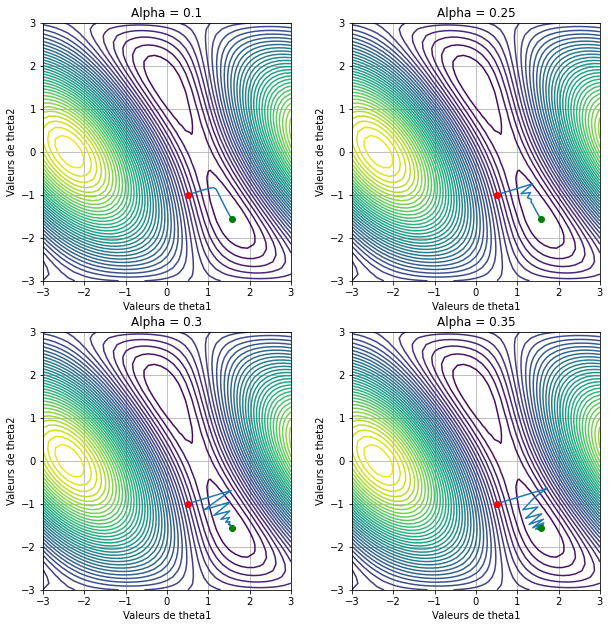

In [6]:
Liste_grad1,n_iter1,indicateur1 = grad_fixe(Residu_2,dResidu_2 , 0.5, -1, 0.1, 1e-5, 100, param)
Liste_grad2,n_iter2,indicateur2 = grad_fixe(Residu_2,dResidu_2 , 0.5, -1, 0.25, 1e-5, 100, param) 
Liste_grad3,n_iter3,indicateur3 = grad_fixe(Residu_2,dResidu_2 , 0.5, -1, 0.3, 1e-5, 100, param) 
Liste_grad4,n_iter4,indicateur4 = grad_fixe(Residu_2,dResidu_2 , 0.5, -1, 0.35, 1e-5, 100, param)

# Domaine de trac√©
xmin, xmax, nx = -3, 3, 41
ymin, ymax, ny = -3, 3, 41


# Discr√©tisation du domaine de trac√©
x1d = np.linspace(xmin,xmax,nx)
y1d = np.linspace(ymin,ymax,ny)
x2d, y2d = np.meshgrid(x1d, y1d)

Z = [[0]*len(y1d) for i in range(len(x1d))]
for i in range(len(x1d)):
    for j in range(len(y1d)):
        f = Residu_2([x1d[i], y1d[j]],param)
        Z[j][i] = f
Z1 = np.array(Z)

# Trac√© des isovaleurs
nIso = 41

#Cr√©ation de plusieurs subplots
fig, ax = plt.subplots(2, 2,figsize=(9,9))
#Espace entre les subplot
fig.tight_layout(pad=3.0)

#Subplot pour alpha = 0.1 
ax[0, 0].contour(x2d,y2d,Z1,nIso)
ax[0, 0].plot(Liste_grad1[0],Liste_grad1[1])
ax[0, 0].plot(Liste_grad1[0][0],Liste_grad1[1][0], c="red",marker="o")
ax[0, 0].plot(Liste_grad1[0][-1],Liste_grad1[1][-1],c="green",marker="o")
ax[0, 0].set_title('Alpha = 0.1')
ax[0, 0].set_xlabel('Valeurs de theta1')
ax[0, 0].set_ylabel('Valeurs de theta2')
ax[0, 0].grid()

#Subplot pour alpha = 0.25
ax[0, 1].contour(x2d,y2d,Z1,nIso)
ax[0, 1].plot(Liste_grad2[0],Liste_grad2[1])
ax[0, 1].plot(Liste_grad2[0][0],Liste_grad2[1][0], c="red",marker="o")
ax[0, 1].plot(Liste_grad2[0][-1],Liste_grad2[1][-1],c="green",marker="o")
ax[0, 1].set_title('Alpha = 0.25')
ax[0, 1].set_xlabel('Valeurs de theta1')
ax[0, 1].set_ylabel('Valeurs de theta2')
ax[0, 1].grid()

#Subplout pour alpha = 0.3
ax[1, 0].contour(x2d,y2d,Z1,nIso)
ax[1, 0].plot(Liste_grad3[0],Liste_grad3[1])
ax[1, 0].plot(Liste_grad3[0][0],Liste_grad3[1][0], c="red",marker="o")
ax[1, 0].plot(Liste_grad3[0][-1],Liste_grad3[1][-1],c="green",marker="o")
ax[1, 0].set_title('Alpha = 0.3')
ax[1, 0].set_xlabel('Valeurs de theta1')
ax[1, 0].set_ylabel('Valeurs de theta2')
ax[1, 0].grid()

#Subplot pour alpha = 0.35
ax[1, 1].contour(x2d,y2d,Z1,nIso)
ax[1, 1].plot(Liste_grad4[0],Liste_grad4[1])
ax[1, 1].plot(Liste_grad4[0][0],Liste_grad4[1][0], c="red",marker="o")
ax[1, 1].plot(Liste_grad4[0][-1],Liste_grad4[1][-1],c="green",marker="o")
ax[1, 1].set_title('Alpha = 0.35')
ax[1, 1].set_xlabel('Valeurs de theta1')
ax[1, 1].set_ylabel('Valeurs de theta2')
ax[1, 1].grid()

In [7]:
print (f"Avec Alpha = 0.1 le minimum est trouv√© apres {n_iter1} iterations ")
print (f"Avec Alpha = 0.25 le minimum est trouv√© apres {n_iter2} iterations ")
print (f"Avec Alpha = 0.3 le minimum est trouv√© apres {n_iter3} iterations ")
print (f"Avec Alpha = 0.35 le minimum est trouv√© apres {n_iter4} iterations ")

Avec Alpha = 0.1 le minimum est trouv√© apres 67 iterations 
Avec Alpha = 0.25 le minimum est trouv√© apres 28 iterations 
Avec Alpha = 0.3 le minimum est trouv√© apres 22 iterations 
Avec Alpha = 0.35 le minimum est trouv√© apres 43 iterations 


- Interpretation:   
Le choix de la longueur des pas est important. La longueur de pas d√©termine la longueur de chaque pas dans la direction n√©gative du gradient pendant l'it√©ration de descente du gradient. Si cette valeur est trop grande, le point de valeur extr√™me risque d'√™tre manqu√© et la convergence ne sera pas possible. Si cette valeur est trop petite, la convergence sera lente.

#### 3.2 Ici, on teste l‚Äôalgorithme pour diff√©rente point de d√©part avec le meme alpha  

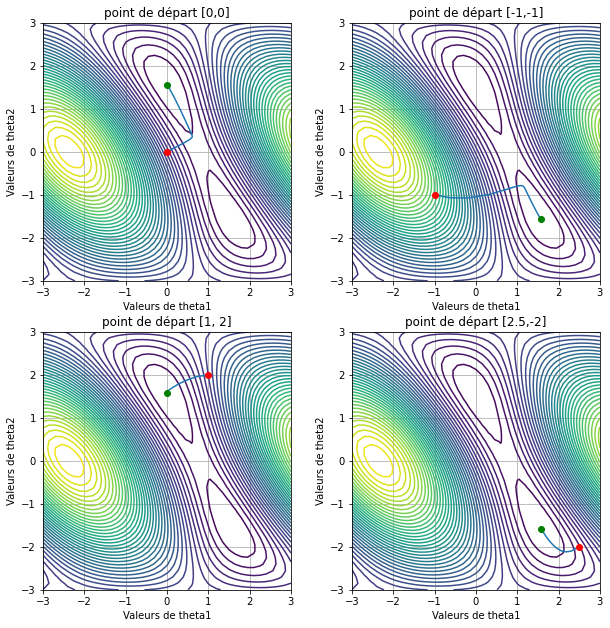

In [10]:
Liste_grad1, n_iter1, indicateur1 = grad_fixe(Residu_2,dResidu_2 , 0,0, 0.1, 1e-5, 100, param)
Liste_grad2, n_iter2, indicateur2 = grad_fixe(Residu_2,dResidu_2 , -1, -1, 0.1, 1e-5, 100, param) 
Liste_grad3, n_iter3, indicateur3 = grad_fixe(Residu_2,dResidu_2 , 1, 2, 0.1, 1e-5, 100, param) 
Liste_grad4, n_iter4, indicateur4 = grad_fixe(Residu_2,dResidu_2 , 2.5, -2, 0.1, 1e-5, 100, param)

# Domaine de trac√©
xmin, xmax, nx = -3, 3, 41
ymin, ymax, ny = -3, 3, 41


# Discr√©tisation du domaine de trac√©
x1d = np.linspace(xmin,xmax,nx)
y1d = np.linspace(ymin,ymax,ny)
x2d, y2d = np.meshgrid(x1d, y1d)

Z = [[0]*len(y1d) for i in range(len(x1d))]
for i in range(len(x1d)):
    for j in range(len(y1d)):
        f = Residu_2([x1d[i], y1d[j]],param)
        Z[j][i] = f
Z1 = np.array(Z)

# Trac√© des isovaleurs
nIso = 41

#Cr√©ation de plusieurs subplots
fig, ax = plt.subplots(2, 2,figsize=(9,9))
#Espace entre les subplot
fig.tight_layout(pad=3.0)

#Subplot pour point de d√©part [0,0]
ax[0, 0].contour(x2d,y2d,Z1,nIso)
ax[0, 0].plot(Liste_grad1[0],Liste_grad1[1])
ax[0, 0].plot(Liste_grad1[0][0],Liste_grad1[1][0], c="red",marker="o")
ax[0, 0].plot(Liste_grad1[0][-1],Liste_grad1[1][-1],c="green",marker="o")
ax[0, 0].set_title('point de d√©part [0,0]')
ax[0, 0].set_xlabel('Valeurs de theta1')
ax[0, 0].set_ylabel('Valeurs de theta2')
ax[0, 0].grid()

#Subplot point de d√©part [-1,-1]
ax[0, 1].contour(x2d,y2d,Z1,nIso)
ax[0, 1].plot(Liste_grad2[0],Liste_grad2[1])
ax[0, 1].plot(Liste_grad2[0][0],Liste_grad2[1][0], c="red",marker="o")
ax[0, 1].plot(Liste_grad2[0][-1],Liste_grad2[1][-1],c="green",marker="o")
ax[0, 1].set_title('point de d√©part [-1,-1]')
ax[0, 1].set_xlabel('Valeurs de theta1')
ax[0, 1].set_ylabel('Valeurs de theta2')
ax[0, 1].grid()

#Subplout point de d√©part [1,2]
ax[1, 0].contour(x2d,y2d,Z1,nIso)
ax[1, 0].plot(Liste_grad3[0],Liste_grad3[1])
ax[1, 0].plot(Liste_grad3[0][0],Liste_grad3[1][0], c="red",marker="o")
ax[1, 0].plot(Liste_grad3[0][-1],Liste_grad3[1][-1],c="green",marker="o")
ax[1, 0].set_title('point de d√©part [1, 2]')
ax[1, 0].set_xlabel('Valeurs de theta1')
ax[1, 0].set_ylabel('Valeurs de theta2')
ax[1, 0].grid()

#Subplot point de d√©part [2.5,-2]
ax[1, 1].contour(x2d,y2d,Z1,nIso)
ax[1, 1].plot(Liste_grad4[0],Liste_grad4[1])
ax[1, 1].plot(Liste_grad4[0][0],Liste_grad4[1][0], c="red",marker="o")
ax[1, 1].plot(Liste_grad4[0][-1],Liste_grad4[1][-1],c="green",marker="o")
ax[1, 1].set_title('point de d√©part [2.5,-2]')
ax[1, 1].set_xlabel('Valeurs de theta1')
ax[1, 1].set_ylabel('Valeurs de theta2')
ax[1, 1].grid()

- Conclusion:  
    - On remarque que en utilisant une valeur de ùõº correcte, Gradient converge vers un minimum m√™me si la valeur initiale choisie est √©loign√©e des minimum contrairement a la m√©thode de newton.



**Teste de la m√©thode du gradient pour un alpha grand**

In [11]:
Liste_graddown,n_iter,indicateurdown = grad_fixe_sansmeca(Residu_2,dResidu_2 , 0.5, -1, 0.5, 1e-5, 100, param)
print(indicateurdown)


Le programme ne converge pas
False


In [12]:
Liste_gradup,n_iter1,indicateurup = grad_fixe(Residu_2,dResidu_2 , 0.5, -1, 0.5, 1e-5, 100, param)
print(indicateurup)

True


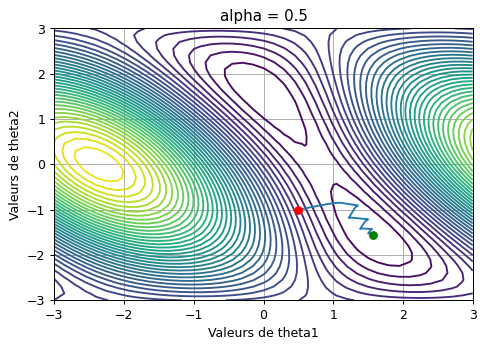

In [13]:
#plot alpha 0.5
plt.figure(figsize=(6, 4), dpi=90)
plt.contour(x2d,y2d,Z1,nIso)
plt.plot(Liste_gradup[0],Liste_gradup[1])
plt.plot(Liste_gradup[0][0],Liste_gradup[1][0], c="red",marker="o")
plt.plot(Liste_gradup[0][-1],Liste_gradup[1][-1],c="green",marker="o")
plt.title('alpha = 0.5')
plt.xlabel('Valeurs de theta1')
plt.ylabel('Valeurs de theta2')
plt.grid()

- Avec le m√©canisme qui ajuste alpha, on a toujours  $ùêΩ(X_{n+1}) < ùêΩ(X_{n})$ et cela fait que notre algorithme converge m√©me avec les plus grandes valeurs de alpha.

### 4. Quatri√®me m√©thode:

#### M√©thode de Newton


On doit √©crire un algorithme qui minimise le carr√© de la norme du r√©sidu en appliquant la m√©thode de Newton.

 #### 4.1 on teste l‚Äôalgorithme pour diff√©rente point de d√©part

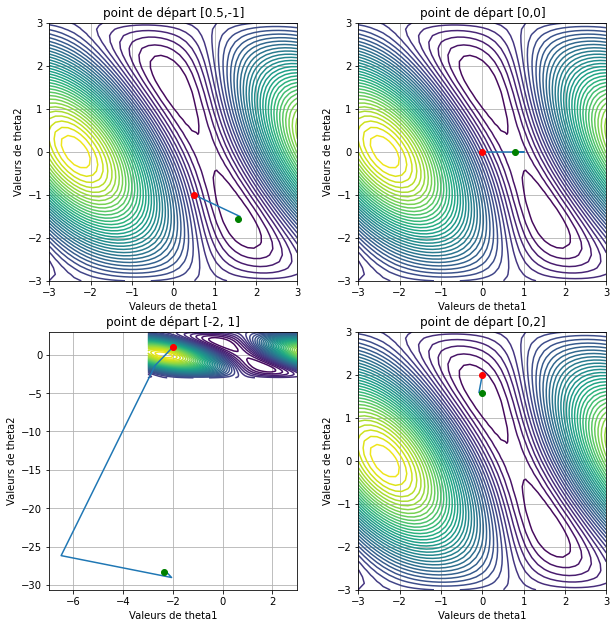

In [18]:
Liste_newton1, n_iter1, indicateur1 = Newton(Residu_2, dResidu_2, H, 0.5, -1, 1e-5, 100, param)
Liste_newton2, n_iter2, indicateur2 = Newton(Residu_2, dResidu_2, H, 0, 0, 1e-5, 100, param)
Liste_newton3, n_iter3, indicateur3 = Newton(Residu_2, dResidu_2, H, -2, 1, 1e-5, 100, param)
Liste_newton4, n_iter4, indicateur4 = Newton(Residu_2, dResidu_2, H, 0, 2, 1e-5, 100, param)

# Domaine de trac√©
xmin, xmax, nx = -3, 3, 41
ymin, ymax, ny = -3, 3, 41


# Discr√©tisation du domaine de trac√©
x1d = np.linspace(xmin,xmax,nx)
y1d = np.linspace(ymin,ymax,ny)
x2d, y2d = np.meshgrid(x1d, y1d)

Z = [[0]*len(y1d) for i in range(len(x1d))]
for i in range(len(x1d)):
    for j in range(len(y1d)):
        f = Residu_2([x1d[i], y1d[j]],param)
        Z[j][i] = f
Z1 = np.array(Z)

# Trac√© des isovaleurs
nIso = 41

#Cr√©ation de plusieurs subplots
fig, ax = plt.subplots(2, 2,figsize=(9,9))
#Espace entre les subplot
fig.tight_layout(pad=3.0)

#Subplot pour point de d√©part [0.5,-1]
ax[0, 0].contour(x2d,y2d,Z1,nIso)
ax[0, 0].plot(Liste_newton1[0],Liste_newton1[1])
ax[0, 0].plot(Liste_newton1[0][0],Liste_newton1[1][0], c="red",marker="o")
ax[0, 0].plot(Liste_newton1[0][-1],Liste_newton1[1][-1],c="green",marker="o")
ax[0, 0].set_title('point de d√©part [0.5,-1]')
ax[0, 0].set_xlabel('Valeurs de theta1')
ax[0, 0].set_ylabel('Valeurs de theta2')
ax[0, 0].grid()

#Subplot point de d√©part [0,0]
ax[0, 1].contour(x2d,y2d,Z1,nIso)
ax[0, 1].plot(Liste_newton2[0],Liste_newton2[1])
ax[0, 1].plot(Liste_newton2[0][0],Liste_newton2[1][0], c="red",marker="o")
ax[0, 1].plot(Liste_newton2[0][-1],Liste_newton2[1][-1],c="green",marker="o")
ax[0, 1].set_title('point de d√©part [0,0]')
ax[0, 1].set_xlabel('Valeurs de theta1')
ax[0, 1].set_ylabel('Valeurs de theta2')
ax[0, 1].grid()

#Subplout point de d√©part [-2,1]
ax[1, 0].contour(x2d,y2d,Z1,nIso)
ax[1, 0].plot(Liste_newton3[0],Liste_newton3[1])
ax[1, 0].plot(Liste_newton3[0][0],Liste_newton3[1][0], c="red",marker="o")
ax[1, 0].plot(Liste_newton3[0][-1],Liste_newton3[1][-1],c="green",marker="o")
ax[1, 0].set_title('point de d√©part [-2, 1]')
ax[1, 0].set_xlabel('Valeurs de theta1')
ax[1, 0].set_ylabel('Valeurs de theta2')
ax[1, 0].grid()

#Subplot point de d√©part [0,2]
ax[1, 1].contour(x2d,y2d,Z1,nIso)
ax[1, 1].plot(Liste_newton4[0],Liste_newton4[1])
ax[1, 1].plot(Liste_newton4[0][0],Liste_newton4[1][0], c="red",marker="o")
ax[1, 1].plot(Liste_newton4[0][-1],Liste_newton4[1][-1],c="green",marker="o")
ax[1, 1].set_title('point de d√©part [0,2]')
ax[1, 1].set_xlabel('Valeurs de theta1')
ax[1, 1].set_ylabel('Valeurs de theta2')
ax[1, 1].grid()

In [19]:
print(f"Pour le point de d√©part [0.5,-1] notre algorithme √† converg√© : {indicateur1}")
print(f"Pour le point de d√©part [0,0] notre algorithme √† converg√© : {indicateur2}")
print(f"Pour le point de d√©part [-2,1] notre algorithme √† converg√© : {indicateur3}")
print(f"Pour le point de d√©part [0,2] notre algorithme √† converg√© : {indicateur4}")

Pour le point de d√©part [0.5,-1] notre algorithme √† converg√© : True
Pour le point de d√©part [0,0] notre algorithme √† converg√© : True
Pour le point de d√©part [-2,1] notre algorithme √† converg√© : True
Pour le point de d√©part [0,2] notre algorithme √† converg√© : True


In [20]:
print(f"Pour le point de d√©part [0.5,-1] le minimum est trouv√© apres {n_iter1} iterations ")
print(f"Pour le point de d√©part [0,0] le minimum est trouv√© apres {n_iter2} iterations ")
print(f"Pour le point de d√©part [-2,1] le minimum est trouv√© apres {n_iter3} iterations ")
print(f"Pour le point de d√©part [0,2] le minimum est trouv√© apres {n_iter4} iterations ")

Pour le point de d√©part [0.5,-1] le minimum est trouv√© apres 4 iterations 
Pour le point de d√©part [0,0] le minimum est trouv√© apres 4 iterations 
Pour le point de d√©part [-2,1] le minimum est trouv√© apres 7 iterations 
Pour le point de d√©part [0,2] le minimum est trouv√© apres 5 iterations 


In [21]:
# Print des solutions
print(f"Pour le point de d√©part [0.5,-1]: Theta1 = {Liste_newton1[0][-1]}   Theta2 = {Liste_newton1[1][-1]}")
print(f"Pour le point de d√©part [0,0]   : Theta1 = {Liste_newton2[0][-1]}   Theta2 = {Liste_newton2[1][-1]}")
print(f"Pour le point de d√©part [-2,1]  : Theta1 = {Liste_newton3[0][-1]}   Theta2 = {Liste_newton3[1][-1]}")
print(f"Pour le point de d√©part [0,2]   : Theta1 = {Liste_newton4[0][-1]} Theta2 = {Liste_newton4[1][-1]}")

Pour le point de d√©part [0.5,-1]: Theta1 = 1.5707963267944147   Theta2 = -1.5707963267910894
Pour le point de d√©part [0,0]   : Theta1 = 0.7853981633974483   Theta2 = 0.0
Pour le point de d√©part [-2,1]  : Theta1 = -2.356194490192345   Theta2 = -28.274333882308138
Pour le point de d√©part [0,2]   : Theta1 = 9.85805582299831e-17 Theta2 = 1.5707963267948966


Conclusion:  
- Cette m√©thode est tr√©s puissante et plus rapide compar√© au gradient a pas fixe.  
- Vu que notre fonction n‚Äôest pas convexe, Newton peut diverger lorsque la valeur initiale choisie est √©loign√©e du minimum.

**En vue d'am√©liorer la performance de notre algorithme On peut combiner entre la m√©thode de gradient √† pas fixe avec la m√©thode de Newton pour tirer parti des avantages de chacune de ces m√©thodes.**

### 5. M√©thode Bonus:

#### M√©thode de descente du gradient √† pas optimal:

nous allons chercher le point suivant dans la direction oppos√©e du gradient. 
Par cons√©quent,$\overrightarrow {X_{n+1}X_n}$ et $\overrightarrow {\nabla J}$ sont colin√©aires. 

DoncÔºåle probl√®me initial se traduit: 

minimiser $J(X)$,sous contrainte
$\overrightarrow {X_{n+1}X_n} \times \overrightarrow {\nabla J} = 0$


$J(\theta)=\begin{pmatrix}L_1cos(\theta_1)+L_2cos(\theta_1+\theta_2)-x  \\ L_1sin(\theta_1)+L_2sin(\theta_1+\theta_2)-y  \end{pmatrix}$  

$\theta_1 = a$ 

$\theta_2 = b$ 

$da = 2*L1*x*sin(a) - 2*L1*y*cos(a) + 2*L2*x*sin(a + b) - 2*L2*y*cos(a + b)$ 

$db = -2*L1*L2*sin(b) + 2*L2*x*sin(a + b) - 2*L2*y*cos(a + b)$


$C(X_{n+1})=\begin{pmatrix}x_{n+1,0}-x_{n,0}\\x_{n+1,1}-x_{n,1}\end{pmatrix} \times \begin{pmatrix}J_{x,1}\\J_{x,2}\end{pmatrix}=J_{x,2}(X_{n+1,0}-X_{n,0})-J_{x,1}(X_{n+1,1}-X_{n,1})$  
Les variables de cette √©quation: $X_{n+1,0}$ et $X_{n+1,1}$  
$\nabla C(x) = \begin{pmatrix}J_{x,2}\\-J_{x,1}\end{pmatrix}$   


Selon la m√©thode du multiplicateur de Lagrange, nous obtenonsÔºö 
$\nabla J(x)+\lambda \nabla C(x) =0$ 

$C(x)= 0$  
Ainsi, le syst√®me d'√©quations peut √™tre obtenuÔºö

                     
$J_{x,1}+\lambda J_{x,2}=0$

$J_{x,2}-\lambda J_{x,1}=0$

$(x_{n+1,1}-x_{n,0})J_{x,2}-(x_{n+1,2}-x_{n,1}) J_{x,1}=0$

In [30]:
alist = []
blist = []
zlist = []

alist.append(0)
blist.append(0)
i_max = 10
i = 0
def f(x):
    L1 = 1
    L2 = 1
    x1 = 1
    y = 1
    da = 2*L1*x1*np.sin(x[0]) - 2*L1*y*np.cos(x[0]) + 2*L2*x1*np.sin(x[0] + x[1]) - 2*L2*y*np.cos(x[0] + x[1])
    db = -2*L1*L2*np.sin(x[1]) + 2*L2*x1*np.sin(x[0] + x[1]) - 2*L2*y*np.cos(x[0] + x[1])

    return np.array([da+x[2]*db,db-x[2]*da,(alist[i]-x[2])*db-(blist[i]-x[1])*da])


while i < i_max:
    sol_fsolve = scipy.optimize.fsolve(f, [1.5, -1.5, 0])
    alist.append(sol_fsolve[0])
    blist.append(sol_fsolve[1])
    i += 1

print(f"Theta1 = {alist[-1]} \nTheta2 = {blist[-1]}")

Theta1 = 1.5707963267944536 
Theta2 = -1.570796326794183


# III. <u>Trajectoire et position du bras articul√©: </u> 

On trace la Trajectoire et position du bras articul√© avec chaque m√©thode 

In [26]:
# D√©finir la trajectoire du bras 
x_,y_ = Trajectoire([0.75,0.5],[2,2])

# La postition du point P
tabx = x_
taby = y_

# Ici on prend un choix L1 = 2 et L2 = 2
L1 = 2
L2 = 2

tab_root = [] # theta trouv√© avec root
tab_minimize = [] # theta trouv√© avec minimize
tab_gradnewton = [] # theta trouv√© avec la collab entre gradient et newton 


for i in range(len(tabx)):

    param = [L1, L2, tabx[i], taby[i]]

    # R√©solution avec la m√©thode de Roor
    tab_root.append(scipy.optimize.root(Residu,[2.5,-2],param).x)

    # R√©solution avec la m√©thode de minimize 
    tab_minimize.append(scipy.optimize.minimize(Residu_2,[2.5,-2],param).x)

    # R√©solution avec la combine Newton et gradient 
    # Apres plusieur teste il s'est av√©r√© que il vaut mieux utilis√© une combine entre la m√©thode de newton et le gradient 
    Liste_grad, n_iter,indicateur = grad_fixe(Residu_2, dResidu_2, 2.5, -2, 0.2, 1e-5, 1000, param)
    liste_newton, n_iter1,indicateur1 = Newton(Residu_2, dResidu_2, H, Liste_grad[0][-1],Liste_grad[1][-1], 1e-5, 100, param)
    tab_gradnewton.append([liste_newton[0][-1], liste_newton[1][-1]])

# Pour facilit√© la manipulation des tableaux on les mets en array
tab_root = np.array(tab_root)
tab_minimize = np.array(tab_minimize)
tab_gradnewton = np.array(tab_gradnewton)

## Trac√© la trajectoire avec la m√©thode root

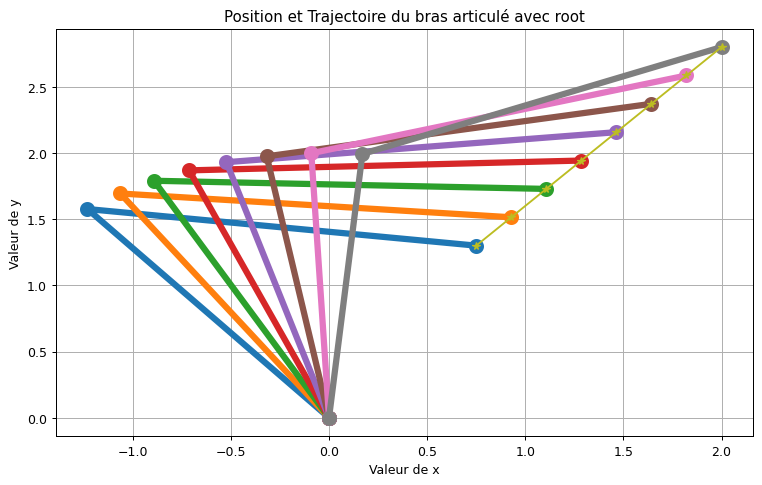

In [27]:
x , y = position(tab_root[:,0],tab_root[:,1])

# Trac√© de la trajectoire avec root
plt.figure(figsize=(10, 6), dpi=90)
for i in range(len(x)):
    plt.plot(x[i], y[i], 'o-', lw=5, mew=6)
plt.plot(x[:,2], y[:,2] , '-*' )
plt.title('Position et Trajectoire du bras articul√© avec root')
plt.xlabel("Valeur de x")
plt.ylabel("Valeur de y")
plt.grid()


## Trac√© la trajectoir avec la m√©thode minimize

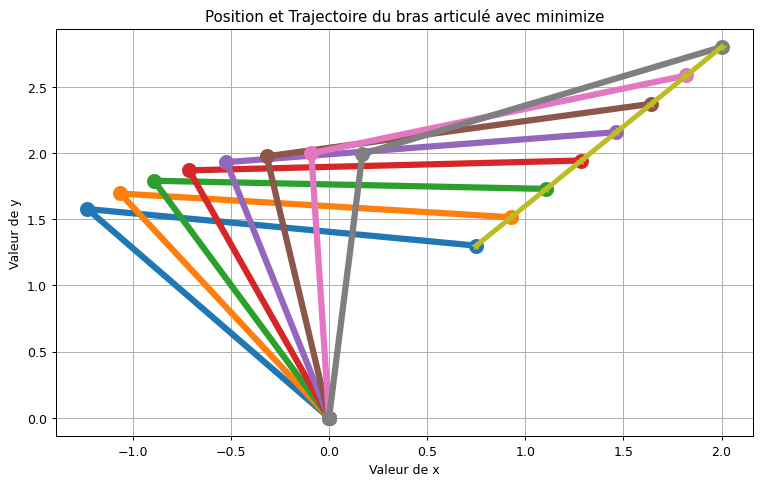

In [28]:
x , y = position(tab_minimize[:,0],tab_minimize[:,1])

#Trac√© de la trajectoire avec minimize
plt.figure(figsize=(10, 6), dpi=90)
for i in range(len(x)):
    plt.plot(x[i], y[i], 'o-', lw=5, mew=6)
plt.plot(x[:,2], y[:,2] , '-*', lw = 4)
plt.title('Position et Trajectoire du bras articul√© avec minimize')
plt.xlabel("Valeur de x")
plt.ylabel("Valeur de y")
plt.grid()

## Trac√© la trajectoir avec la m√©thode du gradient a pas fixe


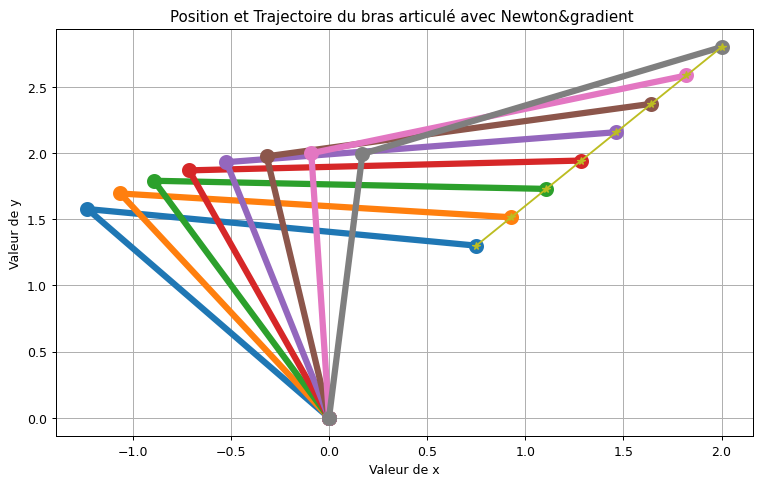

In [29]:
x , y = position(tab_gradnewton[:,0],tab_gradnewton[:,1])

# #Trac√© de la trajectoire avec minimize
plt.figure(figsize=(10, 6), dpi=90)
for i in range(len(x)):
    plt.plot(x[i], y[i], 'o-', lw=5, mew=6)
plt.plot(x[:,2], y[:,2] , '-*' )
plt.title('Position et Trajectoire du bras articul√© avec Newton&gradient ')
plt.xlabel("Valeur de x")
plt.ylabel("Valeur de y")
plt.grid()

**Nous avons utilis√© diff√©rentes m√©thodes pour trouver les positions et trajectoires d'un bras articul√©, ces m√©thodes ont toutes donn√© les m√™mes postions et trajectoires. Cela veut dire que nos algorithmes ont bien fonctionn√© et ont produit des r√©sultats coh√©rents. Cela peut √™tre une indication de la fiabilit√© et de la validit√© de nos algorithmes.**

# IV. <u> Conclusion:</u> 

Sur ce projet, nous avons travaill√© sur un probl√®me dit "inverse" en utilisant des m√©thodes num√©riques telles que la biblioth√®que scipy.optimize, la m√©thode du gradient √† pas fixe et √† pas optimale, et la m√©thode de Newton. Ces m√©thodes vous ont permis de r√©soudre des probl√®mes inverse en partant des sorties d√©sir√©es pour arriver aux entr√©es n√©cessaires.

En travaillant sur ce projet, On a eu √©galement l'occasion de comparer ces diff√©rentes m√©thodes et de voir les diff√©rences entre elles. Nous sommes maintenant en mesure de r√©soudre des probl√®mes inverse de mani√®re efficace.

                                                                     Fait par: HAMDI Massyl Yanis | Wang Jing |  Mokhbi Lyes